**ML Models Training Notebook for Parkinson's Disease Prediction**

**Code for Predicting the Parkinson's Disease**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/parkinsons/parkinsons.data")

In [ ]:
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [ ]:
feature_names = df.columns.tolist()
print("Feature Names:")
for name in feature_names:
    print(name)

Feature Names:
name
MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
status
RPDE
DFA
spread1
spread2
D2
PPE


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5    phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6    phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7    phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8    phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9    phon_R01_S02_4       95.056       120.103        91.226         0.00532   
10   phon_R01_S02_5       88.333       112.240        84.072         0.00505   
11   phon_R01_S02_6       91.904       115.871        86.292         0.00540   
12   phon_R01_S04_1      136.926       159.866       131.276         0.00293   
13   phon_R01_S04_2      139.173       179.139        76.556         0.00390   
14   phon_R01_S04_3      152.845       163.305        75.836         0.00294   
15   phon_R01_S04_4      142.167       217.455        83.159         0.00369   
16   phon_R01_S04_5      144.188       349.259        82.764         0.00544   
17   phon_R01_S04_6      168.778       232.181        75.603         0.00718   
18   phon_R01_S05_1      153.046       175.829        68.623         0.00742   
19   phon_R01_S05_2      156.405       189.398       142.822         0.00768   
20   phon_R01_S05_3      153.848       165.738        65.782         0.00840   
21   phon_R01_S05_4      153.880       172.860        78.128         0.00480   
22   phon_R01_S05_5      167.930       193.221        79.068         0.00442   
23   phon_R01_S05_6      173.917       192.735        86.180         0.00476   
24   phon_R01_S06_1      163.656       200.841        76.779         0.00742   
25   phon_R01_S06_2      104.400       206.002        77.968         0.00633   
26   phon_R01_S06_3      171.041       208.313        75.501         0.00455   
27   phon_R01_S06_4      146.845       208.701        81.737         0.00496   
28   phon_R01_S06_5      155.358       227.383        80.055         0.00310   
29   phon_R01_S06_6      162.568       198.346        77.630         0.00502   
30   phon_R01_S07_1      197.076       206.896       192.055         0.00289   
31   phon_R01_S07_2      199.228       209.512       192.091         0.00241   
32   phon_R01_S07_3      198.383       215.203       193.104         0.00212   
33   phon_R01_S07_4      202.266       211.604       197.079         0.00180   
34   phon_R01_S07_5      203.184       211.526       196.160         0.00178   
35   phon_R01_S07_6      201.464       210.565       195.708         0.00198   
36   phon_R01_S08_1      177.876       192.921       168.013         0.00411   
37   phon_R01_S08_2      176.170       185.604       163.564         0.00369   
38   phon_R01_S08_3      180.198       201.249       175.456         0.00284   
39   phon_R01_S08_4      187.733       202.324       173.015         0.00316   
40   phon_R01_S08_5      186.163       197.724       177.584         0.00298   
41   phon_R01_S08_6      184.055       196.537       166.977         0.00258   
42   phon_R01_S10_1      237.226       247.326       225.227         0.00298   
43   phon_R01_S10_2      241.404       248.834       232.483         0.00281   
44   phon_R01_S10_3      243.439       250.912       232.435         0.00210   
45   phon_R01_S10_4      242.852       255.034       227.911         0.00225   
46   phon_R01_S10_5      245.510       262.090       231.848         0.00235   
47   phon_R01_S10_6      252.455       261.487       182.786         0.00185   
48   phon_R01_S13_1      122.188       128.611       115.765         0.00524   
49   phon_R01_S

In [ ]:
df.head(5)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5    MDVP:APQ  Shimmer:DDA  \
count        195.000000    195.000000    195.000000  195.000000   195.000000   
mean           0.282251      0.015664      0.017878    0.024081     0.046993   
std            0.194877      0.010153      0.012024    0.016947     0.030459   
min            0.085000      0.004550      0.005700    0.007190     0.013640   
25%            0.148500      0.008245      0.009580    0.013080     0.024735   
50%            0.221000      0.012790      0.013470    0.018260     0.038360   
75%            0.350000      0.020265      0.022380    0.029400     0.060795   
max            1.302000      0.056470      0.079400    0.137780     0.169420   

              NHR         HNR      status        RPDE         DFA     spread1  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean     0.024847   21.885974    0.753846    0.498536    0.718099   -5.684397   
std      0.040418    4.425764    0.431878    0.103942    0.055336    1.090208   
min      0.000650    8.441000    0.000000    0.256570    0.574282   -7.964984   
25%      0.005925   19.198000    1.000000    0.421306    0.674758   -6.450096   
50%      0.011660   22.085000    1.000000    0.495954    0.722254   -5.720868   
75%      0.025640   25.075500    1.000000    0.587562    0.761881   -5.046192   
max      0.314820   33.047000    1.000000    0.685151    0.825288   -2.434031   

          spread2          D2         PPE  
count  195.000000  195.000000  195.000000  
mean     0.226510    2.381826    0.206552  
std      0.083406    0.382799    0.090119  
min      0.006274    1.423287    0.044539  
25%      0.174351    2.099125    0.137451  
50%      0.218885    2.361532    0.194052  
75%      0.279234    2.636456    0.252980  
max      0.450493    3.671155    0.527367

In [ ]:
df.shape

(195, 24)

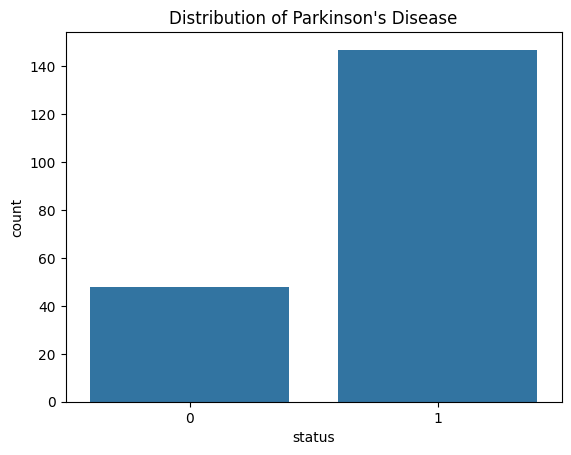

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='status', data=df)
plt.title('Distribution of Parkinson\'s Disease')
plt.show()

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [ ]:
X = df.drop(columns=['name','status'],axis=1)
Y = df['status']


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     0
35     0
36     1
37     1
38     1
39     1
40     1
41     1
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     1
55     1
56     1
57     1
58     1
59     1
60     0
61     0
62     0
63     0
64     0
65     0
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X_train)

StandardScaler()

In [ ]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]
[[-1.70008583e+00 -9.67968410e-01 -7.70130215e-01 -2.75000683e-01
   4.16156683e-01 -2.92615113e-01 -9.70869783e-02 -2.91621655e-01
  -4.94706656e-01 -4.90058396e-01 -5.32488171e-01 -4.26848854e-01
  -3.60251422e-01 -5.32484688e-01 -3.57189713e-01 -1.08840337e-01
   1.06963705e+00  1.05628304e+00  3.72180199e-01  1.94886208e+00
   3.66935071e-02  4.44314482e-01]
 [-1.39044095e+00 -9.29681132e-01 -7.37045677e-01  7.42068829e-01
   1.50451280e+00  8.54349819e-01  7.33639862e-01  8.53234751e-01
  -3.125385

In [ ]:
from sklearn.model_selection import cross_val_score
model = svm.SVC(C=10, gamma='scale', kernel='rbf')
model.fit(X_train, Y_train)
cross_val_scores = cross_val_score(model, X_train, Y_train, cv=5)
print(f"Cross-validated accuracy: {cross_val_scores.mean() * 100:.2f}%")


Cross-validated accuracy: 90.38%


In [ ]:
model.fit(X_train,Y_train)

SVC(C=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)
print(f"KNN Accuracy of training data: {accuracy_score(Y_train, knn_train_pred) * 100:.2f}%")
print(f"KNN Accuracy of testing data: {accuracy_score(Y_test, knn_test_pred) * 100:.2f}%")

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, Y_train)
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)
print(f"Gradient Boosting Accuracy of training data: {accuracy_score(Y_train, gb_train_pred) * 100:.2f}%")
print(f"Gradient Boosting Accuracy of testing data: {accuracy_score(Y_test, gb_test_pred) * 100:.2f}%")

# Ensemble (Voting Classifier)
voting_model = VotingClassifier(estimators=[
    ('logreg', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier())
], voting='hard')

voting_model.fit(X_train, Y_train)
voting_train_pred = voting_model.predict(X_train)
voting_test_pred = voting_model.predict(X_test)
print(f"Ensemble Accuracy of training data: {accuracy_score(Y_train, voting_train_pred) * 100:.2f}%")
print(f"Ensemble Accuracy of testing data: {accuracy_score(Y_test, voting_test_pred) * 100:.2f}%")


KNN Accuracy of training data: 96.79%
KNN Accuracy of testing data: 76.92%
Gradient Boosting Accuracy of training data: 100.00%
Gradient Boosting Accuracy of testing data: 82.05%
Ensemble Accuracy of training data: 98.72%
Ensemble Accuracy of testing data: 84.62%


In [ ]:
# Import necessary libraries for other models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train and evaluate the SVM model
model = svm.SVC(C=10, gamma='scale', kernel='rbf')
model.fit(X_train, Y_train)
cross_val_scores = cross_val_score(model, X_train, Y_train, cv=5)
print(f"SVM Cross-validated accuracy: {cross_val_scores.mean() * 100:.2f}%")
X_train_pred = model.predict(X_train)
train_data_acc = accuracy_score(Y_train, X_train_pred)
print(f"SVM Accuracy of training data: {(train_data_acc * 100):.2f}%")
X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(Y_test, X_test_pred)
print(f"SVM Accuracy of testing data: {(test_data_acc * 100):.2f}%")

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
log_scores = cross_val_score(log_model, X_train, Y_train, cv=5)
print(f"Logistic Regression Cross-validated accuracy: {log_scores.mean() * 100:.2f}%")
log_train_pred = log_model.predict(X_train)
log_train_acc = accuracy_score(Y_train, log_train_pred)
print(f"Logistic Regression Accuracy of training data: {(log_train_acc * 100):.2f}%")
log_test_pred = log_model.predict(X_test)
log_test_acc = accuracy_score(Y_test, log_test_pred)
print(f"Logistic Regression Accuracy of testing data: {(log_test_acc * 100):.2f}%")

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_scores = cross_val_score(rf_model, X_train, Y_train, cv=5)
print(f"Random Forest Cross-validated accuracy: {rf_scores.mean() * 100:.2f}%")
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(Y_train, rf_train_pred)
print(f"Random Forest Accuracy of training data: {(rf_train_acc * 100):.2f}%")
rf_test_pred = rf_model.predict(X_test)
rf_test_acc = accuracy_score(Y_test, rf_test_pred)
print(f"Random Forest Accuracy of testing data: {(rf_test_acc * 100):.2f}%")


SVM Cross-validated accuracy: 90.38%
SVM Accuracy of training data: 99.36%
SVM Accuracy of testing data: 87.18%
Logistic Regression Cross-validated accuracy: 82.72%
Logistic Regression Accuracy of training data: 87.18%
Logistic Regression Accuracy of testing data: 82.05%
Random Forest Cross-validated accuracy: 87.20%
Random Forest Accuracy of training data: 100.00%
Random Forest Accuracy of testing data: 79.49%


**SVM model with best accuracy**

In [ ]:
X_train_pred = model.predict(X_train)
train_data_acc = accuracy_score(Y_train, X_train_pred)
print(f"Accuracy of training data is {(train_data_acc*100):.2f}%")
X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(Y_test,X_test_pred)
print(f"Accuracy of testing data is {(test_data_acc*100):.2f}%")

Accuracy of training data is 99.36%
Accuracy of testing data is 87.18%


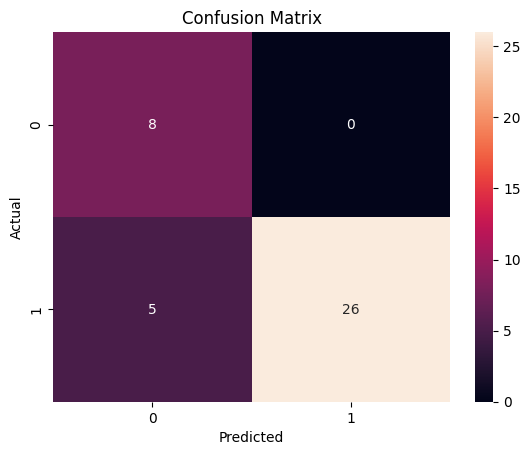

[[ 8  0]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.84      0.91        31

    accuracy                           0.87        39
   macro avg       0.81      0.92      0.84        39
weighted avg       0.92      0.87      0.88        39



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, X_test_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(cm)
print(classification_report(Y_test, X_test_pred))


In [ ]:
from sklearn.metrics import roc_curve, auc
Y_test_proba = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba)
auc_score = auc(fpr, tpr)
print(f'AUC Score: {auc_score}')


AUC Score: 0.935483870967742


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear', 'rbf', 'poly'],
              'C': [0.1, 1, 10],
              'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_ * 100:.2f}%")


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy: 90.38%


In [ ]:
input_data=(116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634)

input_data_np = np.asarray(input_data).reshape(1, -1)

# Standardize the input data using the same scaler
s_data = ss.transform(input_data_np)

# Make the prediction
pred = model.predict(s_data)
print(pred)


[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
if(pred[0]==1):
    print("Parkinson's Disease Found")
else:
    print("Parkinson's Disease Not Found")


Parkinson's Disease Found


In [ ]:
import joblib

joblib.dump(model, 'svm_model.pkl')


['svm_model.pkl']

In [ ]:
joblib.dump(ss, 'scaler.pkl')

['scaler.pkl']

**CODE FOR TOTAL UPDRS SCORE TELEMONITORING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [ ]:
df_telemonitoring = pd.read_csv("/content/drive/MyDrive/parkinsons/parkinsons_updrs.data")

In [ ]:
df_telemonitoring.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_telemonitoring

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0    5.64310      28.1990      34.3980    0.00662   
1            1   72    0   12.66600      28.4470      34.8940    0.00300   
2            1   72    0   19.68100      28.6950      35.3890    0.00481   
3            1   72    0   25.64700      28.9050      35.8100    0.00528   
4            1   72    0   33.64200      29.1870      36.3750    0.00335   
5            1   72    0   40.65200      29.4350      36.8700    0.00353   
6            1   72    0   47.64900      29.6820      37.3630    0.00422   
7            1   72    0   54.64000      29.9280      37.8570    0.00476   
8            1   72    0   61.66900      30.1770      38.3530    0.00432   
9            1   72    0   68.68800      30.4240      38.8490    0.00496   
10           1   72    0   75.65300      30.6700      39.3400    0.00465   
11           1   72    0   82.65300      30.9170      39.8340    0.00537   
12           1   72    0   89.63500      31.3090      40.4120    0.00524   
13           1   72    0   96.63300      31.7760      41.0340    0.00354   
14           1   72    0  103.64000      32.2430      41.6570    0.00530   
15           1   72    0  110.65000      32.7100      42.2800    0.00456   
16           1   72    0  117.66000      33.1780      42.9040    0.00693   
17           1   72    0  124.64000      33.6430      43.5240    0.00652   
18           1   72    0  131.64000      34.1090      44.1460    0.00571   
19           1   72    0  139.69000      34.6460      44.8610    0.00372   
20           1   72    0  145.64000      35.0430      45.3900    0.00285   
21           1   72    0  152.64000      35.5090      46.0130    0.00629   
22           1   72    0  159.64000      35.9760      46.6350    0.00375   
23           1   72    0  174.66000      36.9770      47.9700    0.00386   
24           1   72    0    5.64310      28.1990      34.3980    0.00348   
25           1   72    0   12.66700      28.4470      34.8940    0.00950   
26           1   72    0   19.68200      28.6950      35.3890    0.00401   
27           1   72    0   25.64700      28.9050      35.8100    0.00340   
28           1   72    0   33.64300      29.1870      36.3750    0.00317   
29           1   72    0   40.65200      29.4350      36.8700    0.00471   
30           1   72    0   47.64900      29.6820      37.3630    0.00772   
31           1   72    0   54.64000      29.9280      37.8570    0.00686   
32           1   72    0   61.66900      30.1770      38.3530    0.00292   
33           1   72    0   68.68800      30.4240      38.8490    0.00340   
34           1   72    0   75.65400      30.6700      39.3400    0.00379   
35           1   72    0   82.65300      30.9170      39.8340    0.00736   
36           1   72    0   89.63500      31.3090      40.4120    0.00991   
37           1   72    0   96.63400      31.7760      41.0340    0.00257   
38           1   72    0  103.64000      32.2430      41.6570    0.00395   
39           1   72    0  110.65000      32.7100      42.2800    0.00287   
40           1   72    0  117.67000      33.1780      42.9040    0.00806   
41           1   72    0  124.64000      33.6430      43.5240    0.00656   
42           1   72    0  131.64000      34.1090      44.1460    0.00389   
43           1   72    0  139.69000      34.6460      44.8610    0.00413   
44           1   72    0  145.64000      35.0430      45.3900    0.00383   
45           1   72    0  152.64000      35.5090      46.0130    0.00333   
46           1   72    0  159.64000      35.9760      46.6350    0.00354   
47           1   72    0  166.64000      36.4430      47.2570    0.00419   
48           1   72    0  174.66000      36.9770      47.9700    0.00369   
49           1   72    0    5.64380      28.1990      34.3980    0.00413   
50           1   72    0   12.66700      28.4470      34.8940    0.00293   
51           1   72    0   19.68200      28.6950      

In [ ]:
df_telemonitoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
df_telemonitoring.describe()

subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     29.018942     0.006154     0.000044     0.002987     0.003277   
std      10.700283     0.005624     0.000036     0.003124     0.003732   
min       7.000000     0.000830     0.000002     0.000330     0.000430   
25%      21.371000     0.003580     0.000022     0.001580     0.001820   
50%      27.576000     0.004900     0.000035     0.002250     0.002490   
75%      36.399000     0.006800     0.000053     0.003290     0.003460   
max      54.992000     0.099990     0.000446     0.057540     0.069560   

        Jitter:DDP      Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
count  5875.000000  5875.000000  5875.000000   5875.000000   5875.000000   
mean      0.008962     0.034035     0.310960      0.017156      0.020144   
std       0.009371     0.025835     0.230254      0.013237      0.016664   
min       0.000980     0.003060     0.026000      0.001610      0.001940   
25%       0.004730     0.019120     0.175000      0.009280      0.010790   
50%       0.006750     0.027510     0.253000      0.013700      0.015940   
75%       0.009870     0.039750     0.365000      0.020575      0.023755   
max       0.172630     0.268630     2.107000      0.162670      0.167020   

       Shimmer:APQ11  Shimmer:DDA          NHR          HNR         RPDE  \
count    5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean        0.027481     0.051467     0.032120    21.679495     0.541473   
std         0.019986     0.039711     0.059692     4.291096     0.100986   
min         0.002490     0.004840     0.000286     1.659000     0.151020   
25%         0.015665     0.027830     0.010955    19.406000     0.469785   
50%         0.022710     0.041110     0.018448    21.920000     0.542250   
75%         0.032715     0.061735     0.031463    24.444000     0.614045   
max         0.275460     0.488020     0.748260    37.875000     0.966080   

               DFA          PPE  
count  5875.000000  5875.000000  
mean      0.653240     0.219589  
std       0.070902     0.091498  
min       0.514040     0.021983  
25%       0.596180     0.156340  
50%       0.643600     0.205500  
75%       0.711335     0.264490  
max       0.865600     0.731730

In [ ]:
df_telemonitoring.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [ ]:
X = df_telemonitoring.drop(columns=['subject#', 'total_UPDRS'])
y = df_telemonitoring['total_UPDRS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
scaler_rf = StandardScaler()
X_train = scaler_rf.fit_transform(X_train)
X_test = scaler_rf.transform(X_test)


In [ ]:
model2 = RandomForestRegressor(n_estimators=100, random_state=2)
model2.fit(X_train, y_train)


RandomForestRegressor(random_state=2)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(model2, X_train, y_train, cv=5)
print(f"Cross-validated MSE: {-cv_scores.mean()}")


Cross-validated MSE: -0.9974767968273653


In [ ]:
train_predictions = model2.predict(X_train)
test_predictions = model2.predict(X_test)


In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)


In [ ]:
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R^2: {train_r2:.2f}")
print(f"Testing R^2: {test_r2:.2f}")


Training MSE: 0.03
Testing MSE: 0.19
Training R^2: 1.00
Testing R^2: 1.00


In [ ]:
# ---------------------------------------------------
# Linear Regression
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Predictions for Linear Regression
y_train_pred_linear = model_linear.predict(X_train)
y_test_pred_linear = model_linear.predict(X_test)

# Evaluation for Linear Regression
train_mse_linear = mean_squared_error(y_train, y_train_pred_linear)
test_mse_linear = mean_squared_error(y_test, y_test_pred_linear)
train_r2_linear = r2_score(y_train, y_train_pred_linear)
test_r2_linear = r2_score(y_test, y_test_pred_linear)

print(f"Linear Regression Training MSE: {train_mse_linear:.2f}")
print(f"Linear Regression Testing MSE: {test_mse_linear:.2f}")
print(f"Linear Regression Training R^2: {train_r2_linear:.2f}")
print(f"Linear Regression Testing R^2: {test_r2_linear:.2f}")

# ---------------------------------------------------
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)  # You can change the number of neighbors
model_knn.fit(X_train, y_train)

# Predictions for KNN
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)

# Evaluation for KNN
train_mse_knn = mean_squared_error(y_train, y_train_pred_knn)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
train_r2_knn = r2_score(y_train, y_train_pred_knn)
test_r2_knn = r2_score(y_test, y_test_pred_knn)

print(f"KNN Training MSE: {train_mse_knn:.2f}")
print(f"KNN Testing MSE: {test_mse_knn:.2f}")
print(f"KNN Training R^2: {train_r2_knn:.2f}")
print(f"KNN Testing R^2: {test_r2_knn:.2f}")


Linear Regression Training MSE: 10.55
Linear Regression Testing MSE: 10.62
Linear Regression Training R^2: 0.91
Linear Regression Testing R^2: 0.91
KNN Training MSE: 2.85
KNN Testing MSE: 4.73
KNN Training R^2: 0.98
KNN Testing R^2: 0.96


In [ ]:
input_data = (72, 0, 5.6431, 28.199, 0.00662, 3.38e-005, 0.00401, 0.00317,
              0.01204, 0.02565, 0.23, 0.01438, 0.01309, 0.01662, 0.04314,
              0.01429, 21.64, 0.41888, 0.54842, 0.16006)

# Convert input data into an array and reshape it
input_data_np = np.asarray(input_data).reshape(1, -1)

# Standardize the input data using the same scaler
example_input_scaled = scaler_rf.transform(input_data_np)

# Make the prediction
predicted_updrs = model2.predict(example_input_scaled)
print(f"Predicted Total UPDRS: {predicted_updrs[0]:.2f}")


Predicted Total UPDRS: 47.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(scaler_rf.mean_)
print(scaler_rf.var_)

[6.47459574e+01 3.22553191e-01 9.23562714e+01 2.12236619e+01
 6.18287660e-03 4.41382681e-05 3.00220638e-03 3.30009362e-03
 9.00675745e-03 3.41323447e-02 3.11574894e-01 1.71755149e-02
 2.02236553e-02 2.75660447e-02 5.15264234e-02 3.25998594e-02
 2.16748143e+01 5.41951985e-01 6.53745915e-01 2.19895204e-01]
[7.78209943e+01 2.18512630e-01 2.86895077e+03 6.63440198e+01
 3.26113862e-05 1.32888399e-09 1.01350384e-05 1.46461926e-05
 9.12170748e-05 6.88005481e-04 5.45099789e-02 1.78720161e-04
 2.91338407e-04 4.12229290e-04 1.60848489e-03 3.83859948e-03
 1.87025133e+01 1.01614547e-02 5.03524190e-03 8.35908490e-03]


In [ ]:
def classify_severity(total_updrs):
    if total_updrs <= 20:
        return 'Mild'
    elif 21 <= total_updrs <= 40:
        return 'Moderate'
    else:
        return 'Severe'

# Classify the predicted UPDRS
predicted_severity_python = classify_severity(predicted_updrs[0])
print(f"Predicted Severity using Python logic: {predicted_severity_python}")


Predicted Severity using Python logic: Moderate


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df_telemonitoring is already loaded with relevant data
# Define severity based on total_UPDRS
def classify_severity(total_updrs):
    if total_updrs <= 20:
        return 'Mild'
    elif 21 <= total_updrs <= 40:
        return 'Moderate'
    else:
        return 'Severe'

# Apply the classification function to create a new column
df_telemonitoring['severity'] = df_telemonitoring['total_UPDRS'].apply(classify_severity)

# Define features and target variable for classification
X_classification = df_telemonitoring.drop(columns=['subject#', 'total_UPDRS', 'severity'])
y_classification = df_telemonitoring['severity']

# Split the dataset for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=2)

# Standardize the features (reuse the same scaler)
scaler = StandardScaler()
X_train_classification = scaler.fit_transform(X_train_classification)
X_test_classification = scaler.transform(X_test_classification)


In [ ]:
# Create and train the model
model_classification = RandomForestClassifier(n_estimators=100, random_state=2)
model_classification.fit(X_train_classification, y_train_classification)


RandomForestClassifier(random_state=2)

In [ ]:
train_predictions = model_classification.predict(X_train_classification)
train_accuracy = accuracy_score(y_train_classification, train_predictions)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 100.00%


In [ ]:
test_predictions = model_classification.predict(X_test_classification)
test_accuracy = accuracy_score(y_test_classification, test_predictions)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Testing Accuracy: 96.51%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize models
models = {
    'Logistic Regression Example': LogisticRegression(max_iter=200),
    'K-Nearest Neighbors Example': KNeighborsClassifier(),
    'Support Vector Machine Example': SVC(),
    'Naive Bayes Example': GaussianNB()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_classification, y_train_classification)

    # Predictions
    train_predictions = model.predict(X_train_classification)
    test_predictions = model.predict(X_test_classification)

    # Accuracy
    train_accuracy = accuracy_score(y_train_classification, train_predictions)
    test_accuracy = accuracy_score(y_test_classification, test_predictions)

    print(f"{name} Training Accuracy: {train_accuracy:.2f}")
    print(f"{name} Testing Accuracy: {test_accuracy:.2f}")


Logistic Regression Example Training Accuracy: 0.90
Logistic Regression Example Testing Accuracy: 0.90
K-Nearest Neighbors Example Training Accuracy: 0.96
K-Nearest Neighbors Example Testing Accuracy: 0.92
Support Vector Machine Example Training Accuracy: 0.94
Support Vector Machine Example Testing Accuracy: 0.93
Naive Bayes Example Training Accuracy: 0.53
Naive Bayes Example Testing Accuracy: 0.50


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_classification, test_predictions))
print("Classification Report:")
print(classification_report(y_test_classification, test_predictions))


Confusion Matrix:
[[209  22   0]
 [213 187 314]
 [ 25  15 190]]
Classification Report:
              precision    recall  f1-score   support

        Mild       0.47      0.90      0.62       231
    Moderate       0.83      0.26      0.40       714
      Severe       0.38      0.83      0.52       230

    accuracy                           0.50      1175
   macro avg       0.56      0.66      0.51      1175
weighted avg       0.67      0.50      0.46      1175



In [ ]:
example_input = np.array([[72, 0, 5.6431, 28.199, 34.398, 0.00662, 3.38e-005, 0.00401, 0.00317,
                           0.01204, 0.02565, 0.23, 0.01438, 0.01309, 0.01662, 0.04314,
                           0.01429, 21.64, 0.41888, 0.54842]])


In [ ]:
# Create a DataFrame for the example input
example_input_df = pd.DataFrame(example_input, columns=X_classification.columns)

# Standardize the example input
example_input_scaled_classification = scaler.transform(example_input_df)

# Make a prediction for severity using ML
predicted_severity_ml = model_classification.predict(example_input_scaled_classification)
print(f"Predicted Severity using ML: {predicted_severity_ml[0]}")


Predicted Severity using ML: Severe


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_classification = RandomForestClassifier(n_estimators=100, random_state=2)
model_classification.fit(X_train_classification, y_train_classification)

# Get feature importances
importances = model_classification.feature_importances_
feature_names = X_classification.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(20))  # Print top 20 features


          Feature  Importance
3     motor_UPDRS    0.533074
0             age    0.120395
18            DFA    0.049635
2       test_time    0.042269
5     Jitter(Abs)    0.026100
16            HNR    0.023572
17           RPDE    0.021122
19            PPE    0.021020
1             sex    0.020939
15            NHR    0.014636
7     Jitter:PPQ5    0.014463
12   Shimmer:APQ5    0.013638
13  Shimmer:APQ11    0.013622
14    Shimmer:DDA    0.013241
11   Shimmer:APQ3    0.013153
6      Jitter:RAP    0.012426
9         Shimmer    0.012052
4       Jitter(%)    0.012014
8      Jitter:DDP    0.011509
10    Shimmer(dB)    0.011121


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Use a SVC as the model for RFE
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=20)
rfe.fit(X_train_classification, y_train_classification)

# Get selected features
selected_features = X_classification.columns[rfe.support_]
print(selected_features)


Index(['age', 'sex', 'test_time', 'motor_UPDRS', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


In [ ]:
joblib.dump(model2, 'rf_model.pkl')
joblib.dump(model_classification, 'rf_classifier.pkl')
joblib.dump(scaler_rf, 'scaler_rf.pkl')



['scaler_rf.pkl']